In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [ ]:
class MultiClassSVM(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassSVM, self).__init__()
        self.linear = nn.Linear(input_size, num_classes,bias=False)

    def forward(self, x):
        return self.linear(x)
    
def hinge_loss(outputs, labels):
    num_classes = outputs.size(1)
    correct_indices = labels.view(-1, 1)
    correct_scores = outputs.gather(1, correct_indices)
    margins = torch.clamp(1 - (correct_scores - outputs), min=0)
    margins.scatter_(1, correct_indices, 0)
    loss = margins.mean()
    return loss

def train(
    model,
    train_loader,    
    ):
    for batch_idx, (data, target) in enumerate(train_loader):
        output = model(data.float())
        loss = hinge_loss(output, target)
        loss.backward()
        _, argmax = torch.max(output, 1)
        accuracy = (target == argmax.squeeze()).float().mean()
        print("accuracy is",accuracy)


In [ ]:
svm = MultiClassSVM(input_size=28,num_classes=10)

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
        
    ),
    batch_size=64,
    shuffle=True,
    
)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
    ),
    batch_size=64,
)
train(svm,train_loader)

In [9]:
import numpy as np
import os
data = np.load('D:/ASU/STAM/Norse/w1.npy')
print(data)

[[[[7.85848275e-09 9.97469127e-01 1.92993343e-06 6.57419562e-01
    4.83913725e-04]
   [1.49799314e-06 9.99681950e-01 2.06794997e-04 5.14789999e-01
    6.35405406e-02]
   [1.05560954e-04 9.99977589e-01 9.38883543e-01 4.75087911e-01
    1.04866466e-02]
   [3.46625427e-04 9.99843419e-01 9.90610659e-01 7.55931914e-01
    2.18278989e-02]
   [1.98883354e-05 9.99075532e-01 3.55906996e-05 4.35287245e-02
    5.28501093e-01]]]


 [[[9.99755800e-01 9.99992549e-01 9.99992549e-01 9.99992549e-01
    2.34674801e-12]
   [9.99981821e-01 9.99992549e-01 9.99992549e-01 9.99992549e-01
    1.14523428e-14]
   [9.99989092e-01 9.99992549e-01 9.99992549e-01 9.99992549e-01
    1.35918268e-16]
   [9.99992549e-01 9.99992549e-01 9.99992549e-01 1.74382875e-09
    2.21996293e-18]
   [9.99963343e-01 9.99992549e-01 9.99992549e-01 6.21622212e-06
    3.54501050e-16]]]


 [[[9.99992549e-01 8.48659809e-08 8.73192549e-01 9.99992549e-01
    9.96447027e-01]
   [9.99992549e-01 1.48631042e-12 1.76179404e-10 9.99992549e-01
    

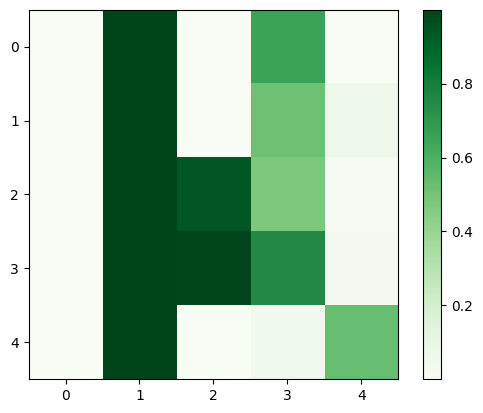

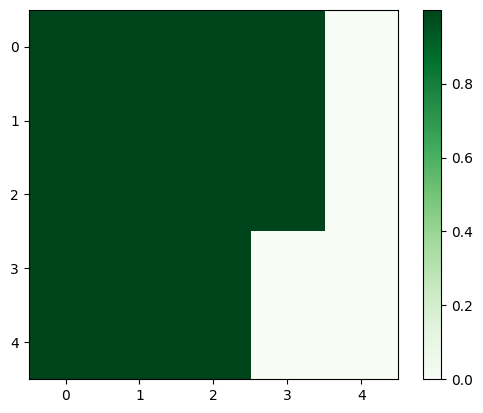

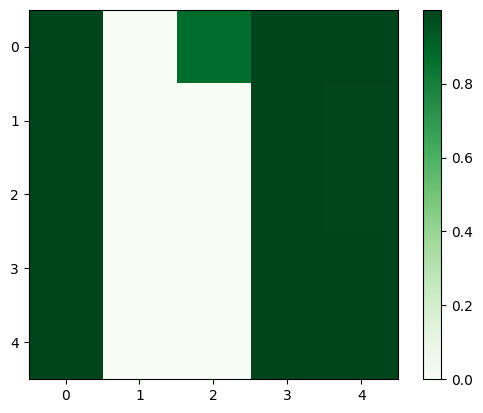

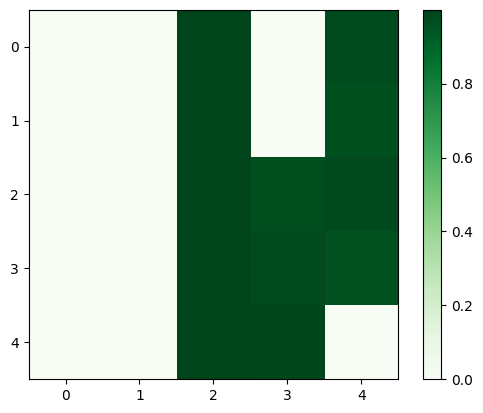

In [8]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(data.shape[0]):
    plt.imshow(data[i,0], cmap='Greens', interpolation='nearest')
    plt.colorbar()  # 添加颜色条
    plt.show()
